In [ ]:
# WeatherPy
#Module 6 homework. AO. handed in late this was fishing opener I skipeed it. 
---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 576


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + '&appid=' + str(weather_api_key) + '&q=' + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]  
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]        
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | avarua
Processing Record 2 of Set 1 | tamiahua
Processing Record 3 of Set 1 | iskateley
Processing Record 4 of Set 1 | port lincoln
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | ilulissat
Processing Record 8 of Set 1 | korla
Processing Record 9 of Set 1 | bengkulu
Processing Record 10 of Set 1 | punta del este
Processing Record 11 of Set 1 | isafjordur
Processing Record 12 of Set 1 | lamu
Processing Record 13 of Set 1 | grytviken
Processing Record 14 of Set 1 | manay
Processing Record 15 of Set 1 | alofi
Processing Record 16 of Set 1 | bilibino
Processing Record 17 of Set 1 | ulanhot
Processing Record 18 of Set 1 | mindelo
Processing Record 19 of Set 1 | longyearbyen
Processing Record 20 of Set 1 | midvagur
Processing Record 21 of Set 1 | puerto natales
Processing Record 22 of Set 1 | invercargill
Processing Record 23 of Se

Processing Record 40 of Set 4 | zag
Processing Record 41 of Set 4 | narrabri
Processing Record 42 of Set 4 | aqadyr
Processing Record 43 of Set 4 | atafu village
Processing Record 44 of Set 4 | caleta de carquin
Processing Record 45 of Set 4 | carnarvon
Processing Record 46 of Set 4 | naracoorte
Processing Record 47 of Set 4 | chonchi
Processing Record 48 of Set 4 | fortuna
Processing Record 49 of Set 4 | conceicao da barra
Processing Record 0 of Set 5 | port elizabeth
Processing Record 1 of Set 5 | kresttsy
Processing Record 2 of Set 5 | cidreira
Processing Record 3 of Set 5 | kolonia town
Processing Record 4 of Set 5 | cibolo
Processing Record 5 of Set 5 | kailua-kona
Processing Record 6 of Set 5 | quellon
Processing Record 7 of Set 5 | kirensk
Processing Record 8 of Set 5 | santo antonio do ica
Processing Record 9 of Set 5 | taro
Processing Record 10 of Set 5 | chaman
Processing Record 11 of Set 5 | caister-on-sea
Processing Record 12 of Set 5 | conde
Processing Record 13 of Set 5 |

Processing Record 30 of Set 8 | tromso
Processing Record 31 of Set 8 | skiatook
Processing Record 32 of Set 8 | hudson
Processing Record 33 of Set 8 | juneau
Processing Record 34 of Set 8 | pangody
Processing Record 35 of Set 8 | baglung
Processing Record 36 of Set 8 | ar rutbah
Processing Record 37 of Set 8 | chilaw
Processing Record 38 of Set 8 | vredenburg
City not found. Skipping...
Processing Record 39 of Set 8 | vetluga
Processing Record 40 of Set 8 | arteche
Processing Record 41 of Set 8 | kalmunai
Processing Record 42 of Set 8 | luanda
Processing Record 43 of Set 8 | kearney
Processing Record 44 of Set 8 | chudovo
Processing Record 45 of Set 8 | ceeldheer
Processing Record 46 of Set 8 | port hedland
Processing Record 47 of Set 8 | poteau
Processing Record 48 of Set 8 | baiona
Processing Record 49 of Set 8 | lata
Processing Record 0 of Set 9 | tindouf
Processing Record 1 of Set 9 | alta
Processing Record 2 of Set 9 | bismarck
Processing Record 3 of Set 9 | vallenar
Processing Re

Processing Record 22 of Set 12 | nadi
Processing Record 23 of Set 12 | sandnessjoen
Processing Record 24 of Set 12 | dul'durga
Processing Record 25 of Set 12 | karratha
-----------------------------
Data Retrieval Complete      
-----------------------------


In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          550
Lat           550
Lng           550
Max Temp      550
Humidity      550
Cloudiness    550
Wind Speed    550
Country       550
Date          550
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,avarua,-21.2078,-159.7750,292.18,68,100,1.54,CK,1692540137
1,tamiahua,21.2667,-97.4500,300.64,84,100,2.27,MX,1692540138
2,iskateley,67.6803,53.1512,279.79,95,100,6.95,RU,1692540138
3,port lincoln,-34.7333,135.8667,286.96,84,100,3.47,AU,1692540139
4,waitangi,-43.9535,-176.5597,285.27,96,100,4.02,NZ,1692540139


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

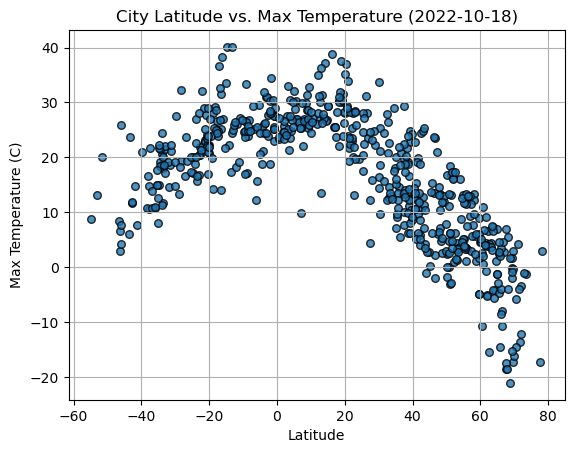

In [13]:
# Build scatter plot for latitude vs. temperature
#datetime issues fix thank you Jason
from datetime import datetime
unix = int(city_data_df['Date'][0])
dttime = datetime.utcfromtimestamp(unix).strftime('%Y-%m-%d')

# Incorporate the other graph properties
city_data_df.plot.scatter(x = "Lat", y = 'Max Temp', grid = True, title = f'City Latitude vs. Max Temperature ({dttime})',
                         xlabel = 'Latitude', ylabel = 'Max Temperature (C)', edgecolor = 'black', s = 30, alpha = 0.8)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

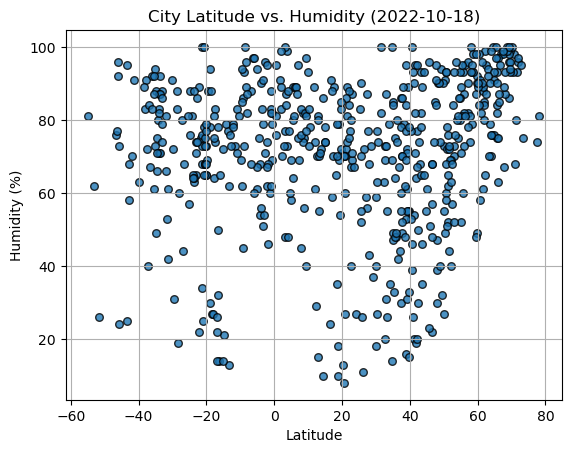

In [14]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter(x = "Lat", y = 'Humidity', grid = True, title = f'City Latitude vs. Humidity ({dttime})',
                         xlabel = 'Latitude', ylabel = 'Humidity (%)', edgecolor = 'black', s = 30, alpha = 0.8)
 

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

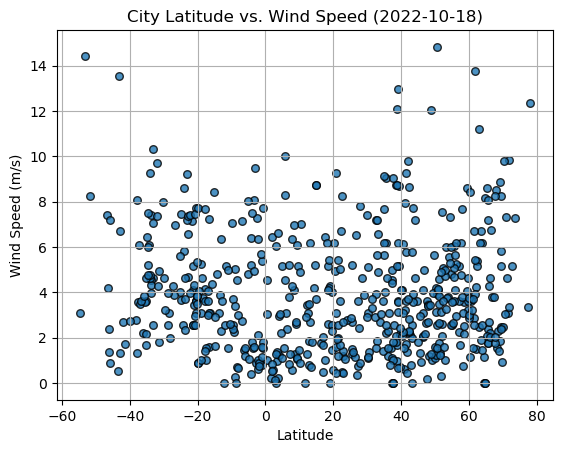

In [15]:
# Build the scatter plots for latitude vs. cloudiness
 
city_data_df.plot.scatter(x = "Lat", y = 'Wind Speed', grid = True, title = f'City Latitude vs. Wind Speed ({dttime})',
                         xlabel = 'Latitude', ylabel = 'Wind Speed (m/s)', edgecolor = 'black', s = 30, alpha = 0.8)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

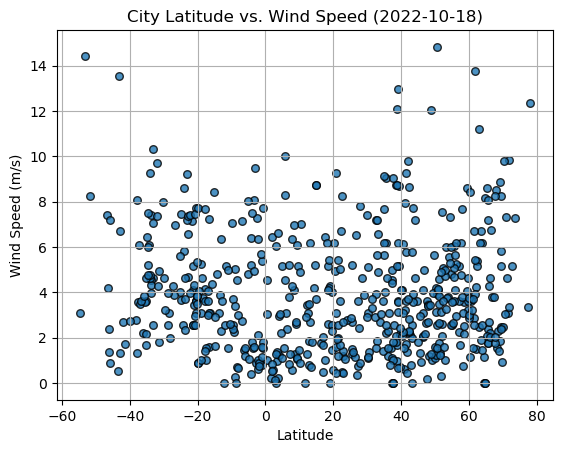

In [16]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter(x = "Lat", y = 'Wind Speed', grid = True, title = f'City Latitude vs. Wind Speed ({dttime})',
                         xlabel = 'Latitude', ylabel = 'Wind Speed (m/s)', edgecolor = 'black', s = 30, alpha = 0.8)

 
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [22]:
# Define a function to create Linear Regression plots
def linReg(df,x,y,x_text,y_text):    
    lm = st.linregress(x = df[x], y = df[y])
    data_fit = lm[0]*df[x] + lm[1]
    fit_df = pd.DataFrame({'x': df[x], 'fitted': data_fit})
    ax = df.plot.scatter(y = y, x = x, s = 30)
    print(f"The Rvalue is: {lm[2]}")
    fit_df.plot.line(x = 'x', y = 'fitted', color = 'red', ax=ax, legend = None, xlabel = x)
    plt.text(x_text,y_text,f"y = {'%.2f' %lm[0]}x + {'%.1f' %lm[1]}", color = 'red', fontsize = 16)

In [23]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [24]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] <= 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8462548186825359


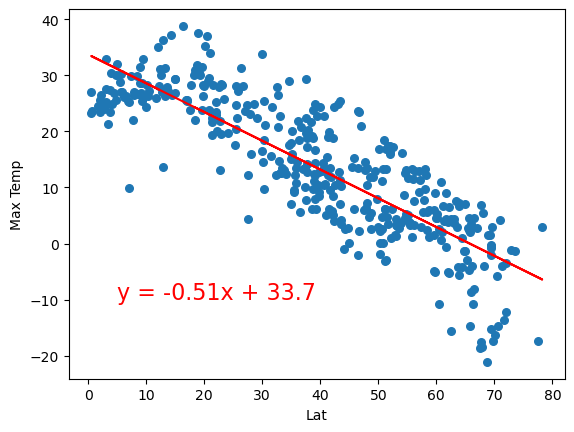

In [25]:
# Linear regression on Northern Hemisphere
import scipy.stats as st
reg(northern_hemi_df,'Lat','Max Temp',5,-10)

The r-value is: 0.6419546065421795


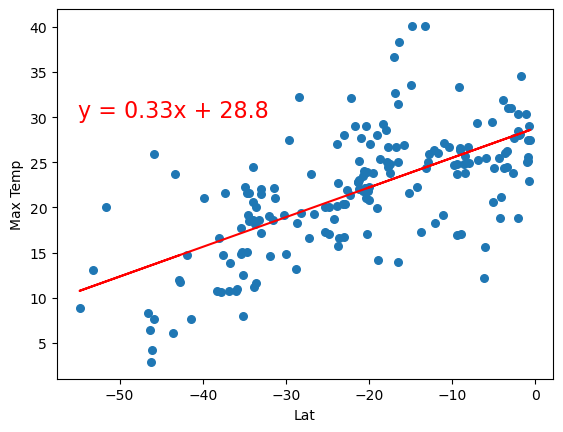

In [26]:
# Linear regression on Southern Hemisphere
reg(southern_hemi_df,'Lat','Max Temp',-55,30)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.2385317912939405


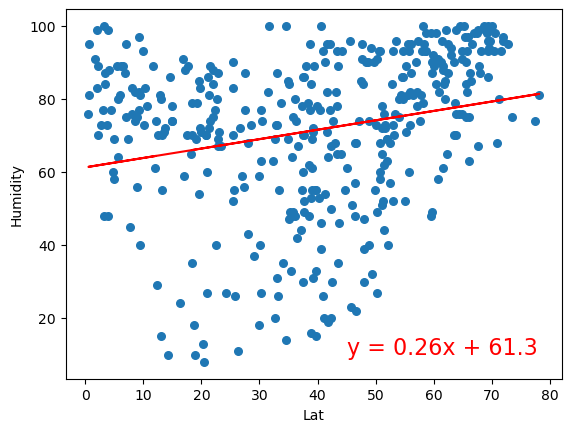

In [27]:
# Northern Hemisphere
reg(northern_hemi_df,'Lat','Humidity',45,10)

The r-value is: 0.016759316950056814


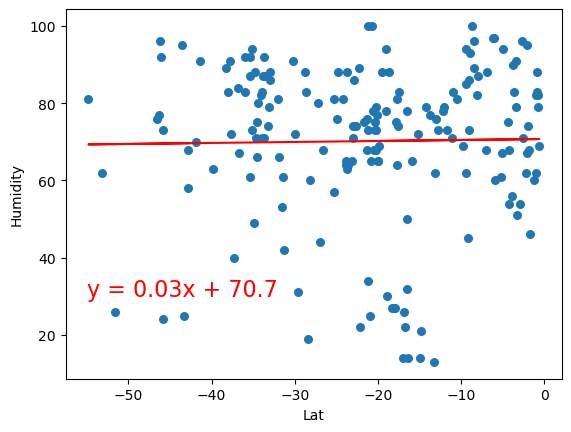

In [28]:
# Southern Hemisphere
reg(southern_hemi_df,'Lat','Humidity',-55,30)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.1550048938769709


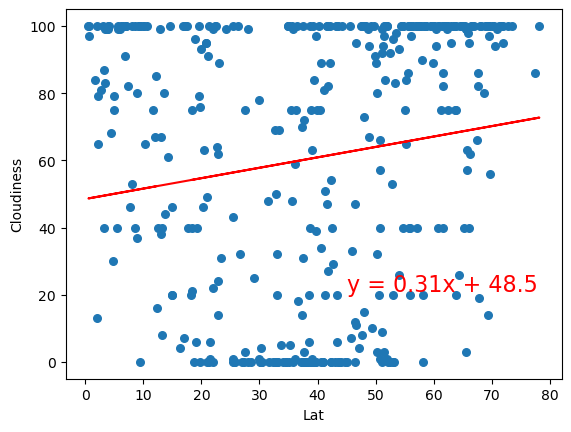

In [29]:

# Northern Hemisphere
reg(northern_hemi_df,'Lat','Cloudiness',45,21)


The r-value is: 0.14341322916643243


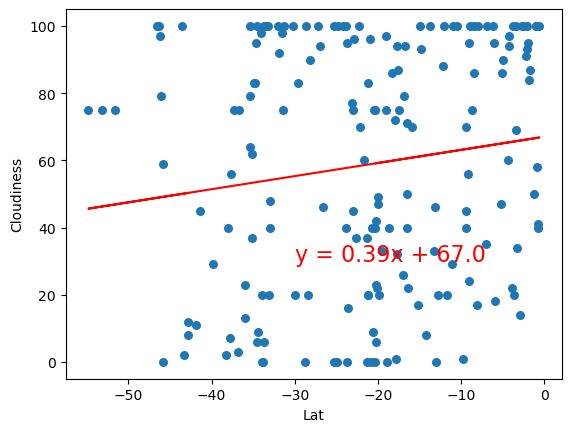

In [30]:
# Southern Hemisphere
reg(southern_hemi_df,'Lat','Cloudiness',-30,30)


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.17434667290903338


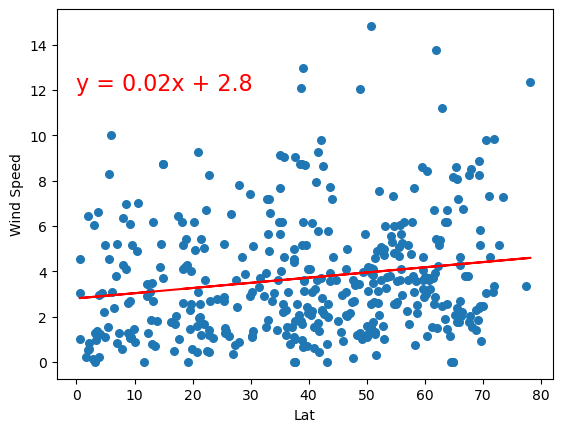

In [31]:

# Northern Hemisphere
reg(northern_hemi_df,'Lat','Wind Speed',0,12)

The r-value is: -0.24947753546264592


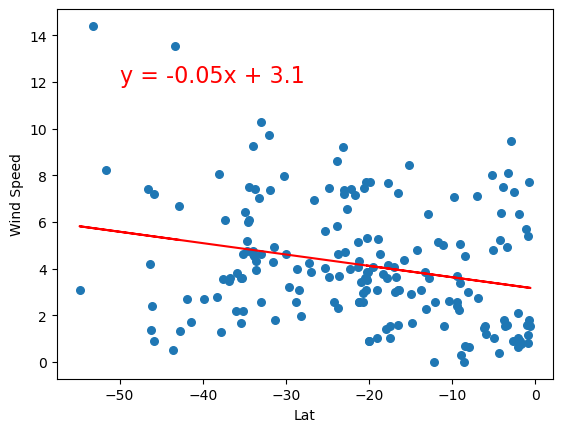

In [32]:
# Southern Hemisphere
reg(southern_hemi_df,'Lat','Wind Speed',-50,12)